In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
#import plotly.express as px
%matplotlib inline
companies = ["","Apple", "Facebook", "GE", "Google", "IBM", "Microsoft", "PG"]
model = ["Linear", "Log", "Exponential", "Power"]

def calculateR2(knownYs, Z):
    if skip:
        pred = Z 
    else:
        pred = []
        for i in range(0,len(data)):
            pred.append(Z[i,i])    
        pred = np.array(pred)
       
    residuals = knownYs - pred
    ss_res = np.sum(residuals**2)
    ss_tot =np.sum((knownYs - np.mean(knownYs))**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def saveFile(company, model):
    savefile = "pics2\\" + company + "_" + model +".png"    
    plt.savefig(savefile, dpi=150, bbox_inches='tight')
    
def addText(ax, text):
   ax.text(0.05, 0.85, text, transform=ax.transAxes,size=14)
   
def addText2D(ax, text):
   ax.text2D(0.05, 0.85, text, transform=ax.transAxes,size=14)
   
def plotData2D(model):
    plt.style.use("seaborn")
    fig = plt.figure(figsize=[10,6])
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=None, bottom=0, right=None, top=1.01, wspace=0, hspace=4)
    fig.suptitle(company + " " + model +" Regression Model", ha="center", size=20)
    
    ax.scatter(x, y,c="r", s=70)
    ax.set_xlabel("Revenue", labelpad=14, fontsize=14)
    ax.set_ylabel("Earnings", labelpad=20, fontsize=14)
    return fig, ax

def plotData3D(model):
    plt.style.use("seaborn")
    fig = plt.figure(figsize=[10,6])
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=None, bottom=0, right=None, top=1.01, wspace=0, hspace=4)
    fig.suptitle(company +" " + model + " Regression Model", ha="center", size=20)
    
    ax.scatter(x, y, z,c="r", s=70)
    ax.set_xlabel("Revenue", labelpad=14, fontsize=14)
    ax.set_ylabel("Earnings", labelpad=20, fontsize=14)
    ax.set_zlabel("Dividends", labelpad=10, fontsize=14)
    return fig, ax

def bestFit():
    best = np.where(r2_scores == max(r2_scores))
    pos = best[0][0]
    bestFittingModel = model[pos]
    return pos, bestFittingModel
    

dataOriginal = pd.read_csv("stocks_data.csv")
lastQuarterData = pd.read_csv("stocks_last_quarter.csv")
r2_scores = np.empty([4],dtype=float)

for i in range(5,6):
    r2_scores = np.zeros([4],dtype=float)
    company = companies[i]
    
    data = dataOriginal[dataOriginal.Company==company]
    lastQuarter = lastQuarterData[lastQuarterData.Company==company]
    #compare your prediction to lastQuarter.Revenue  float(lastQuarter['EPS Diluted'])
    x = np.array(data['Revenue'])
    y = np.array(data['EPS Diluted'])
    z = np.array(data['Dividend per Share'])
    if all(z==0):
        skip=True
    else:
        skip=False

IBM R² for LINEAR regression is 0.0359


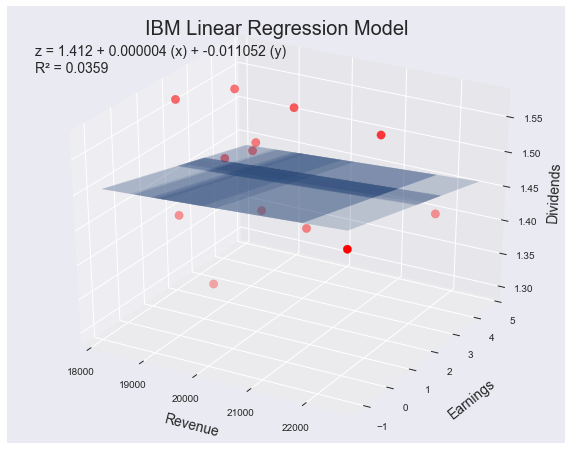

In [2]:
fig, ax = plotData3D("Linear")
        
a = np.ones(len(x))
b = np.vstack([a,x,y]).T
values = np.linalg.lstsq(b,z)
intercept = values[0][0]
coeff1 = values[0][1]
coeff2 = values[0][2]

X,Y = np.meshgrid(x,y)
Z = intercept + coeff1*X + coeff2*Y
surf = ax.plot_surface(X, Y, Z, alpha=.07)

r2 = calculateR2(z,Z)
r2_scores[0]=r2
equation = "z = {0:.3f}".format(intercept) +" + {0:.6f}".format(coeff1) +" (x) + {0:.6f}".format(coeff2) + " (y)"
t = equation +"\nR\N{SUPERSCRIPT TWO} = {0:.4f}".format(r2)
addText2D(ax, t)
print(company + " R\N{SUPERSCRIPT TWO} for LINEAR regression is {0:.4f}".format(r2))

#saveFile(company, "Linear")
#plt.close()

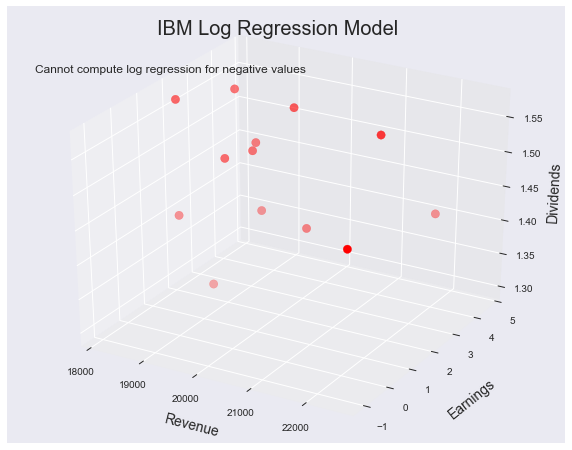

In [3]:
fig, ax = plotData3D("Log")

if all(y>0):

    log_x = np.log(x)
    log_y = np.log(y)

    a=np.ones(len(x))
    b = np.vstack([a, log_x, log_y]).T
    values = np.linalg.lstsq(b,(z))
    intercept = values[0][0]
    coeff1 = values[0][1]
    coeff2 = values[0][2]

    X,Y = np.meshgrid(x,y)
    Z = intercept +(coeff1*np.log(X)) + (coeff2*np.log(Y))
    surf = ax.plot_surface(X,Y,Z, alpha=.07)

    r2 = calculateR2(z,Z)
    r2_scores[1]=r2
    equation = "z = {0:.3f}".format(intercept) +" + {0:.6f}".format(coeff1) +" ln(x) + {0:.6f}".format(coeff2) + " ln(y)"
    #bbox_props = dict(boxstyle="square,pad=0.3", fc="yellow", ec="r", lw=2)
    #t = ax.text(20000, .250, .48, equation +"\nR\N{SUPERSCRIPT TWO} = {0:.4f}".format(r2), ha="center", va="center", rotation=45,size=12,bbox=bbox_props)
    t = equation +"\nR\N{SUPERSCRIPT TWO} = {0:.4f}".format(r2)
    addText2D(ax,t)
    print(company + " R\N{SUPERSCRIPT TWO} for LOG regression is {0:.4f}".format(r2))

else:
    t = "Cannot compute log regression for negative values"
    ax.text2D(0.05, 0.85, t, transform=ax.transAxes,size=12)

#saveFile(company, "Log")
#plt.close()

IBM R² for EXPONENTIAL regression is 0.0346


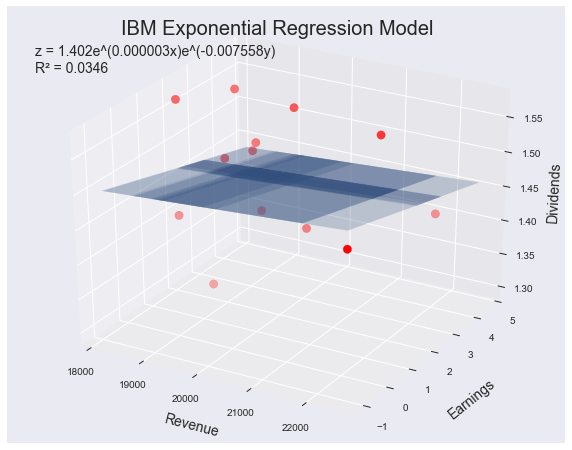

In [4]:
x = np.array(data['Revenue'])
y= np.array(data['EPS Diluted'])

fig, ax = plotData3D("Exponential")

#fig.tight_layout(rect=[0,0,1.3,1.1]) 
#fig.tight_layout(pad=1)

log_z = np.log(z)

a=np.ones(len(x))
b = np.vstack([a, x, y]).T
values = np.linalg.lstsq(b,log_z)
intercept = values[0][0]
coeff1 = values[0][1]
coeff2 = values[0][2]

C = np.exp(intercept)
X,Y = np.meshgrid(x,y)
Z = C *(np.exp(coeff1*X))*(np.exp(coeff2*Y))
surf = ax.plot_surface(X, Y, Z, alpha=.07)

r2 = calculateR2(z,Z)
r2_scores[2]=r2
equation = "z = {0:.3f}".format(C) +"e^({0:.6f}".format(coeff1) +"x)e^({0:.6f}".format(coeff2)+"y)"
t = equation +"\nR\N{SUPERSCRIPT TWO} = {0:.4f}".format(r2)
addText2D(ax,t)
print(company + " R\N{SUPERSCRIPT TWO} for EXPONENTIAL regression is {0:.4f}".format(r2))

#saveFile(company, "Exponential")
#plt.close()

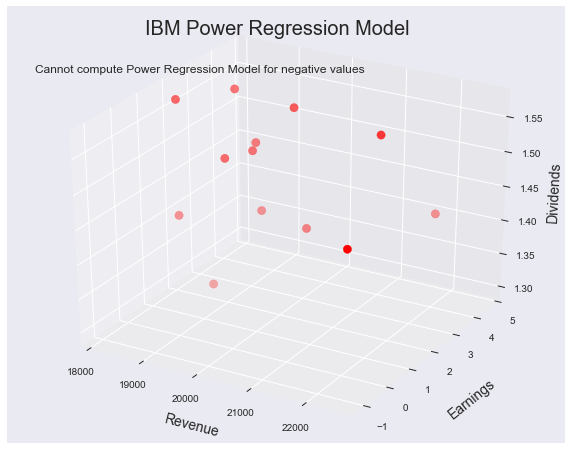

In [5]:
fig, ax = plotData3D("Power")

if all(x>0) and all(y>0):

    log_x = np.log10(x)
    log_y = np.log10(y)
    log_z = np.log10(z)

    a=np.ones(len(x))
    b = np.vstack([a, log_x, log_y]).T
    values = np.linalg.lstsq(b,np.log10(z))
    intercept = values[0][0]
    coeff1 = values[0][1]
    coeff2 = values[0][2]

    C=10**intercept
    X,Y = np.meshgrid(x,y)
    Z = C *(X**coeff1)*(Y**coeff2)
    surf = ax.plot_surface(X, Y, Z, alpha=.07)

    r2 = calculateR2(z,Z)
    r2_scores[3]=r2
    equation = "z = {0:.3f}".format(C) +"(x^{0:.6f}".format(coeff1) +")(y^{0:.6f}".format(coeff2)+")"
    t = equation +"\nR\N{SUPERSCRIPT TWO} = {0:.4f}".format(r2)
    addText2D(ax,t)
    print(company + " R\N{SUPERSCRIPT TWO} for POWER regression is {0:.4f}".format(r2))

else:
    t = "Cannot compute Power Regression Model for negative values"
    ax.text2D(0.05, 0.85, t, transform=ax.transAxes,size=12)

#saveFile(company, "Power")
#plt.close()

In [6]:
pos, bestModel = bestFit()    
print("******* Best fit for " + company + " is " + bestModel + " Model, R\N{SUPERSCRIPT TWO} = {0:.4f}".format(r2_scores[pos]) +"*******\n")

******* Best fit for IBM is Linear Model, R² = 0.0359*******

